# Final Project Exploratory Data Analysis

Do your EDA in this notebook!

# Hello World

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

#import os
#import tarfile
#from six.moves import urllib

# import plotly
# import plotly.plotly as py
# import plotly.graph_objs as go
# plotly.offline.init_notebook_mode()

# print(f'I am using {pd.__name__} Version: {pd.__version__}.')
# print(f'It is installed at: {pd.__path__}')

In [89]:
climbing = pd.read_csv('data/sport2.csv')

In [90]:
# here is what i do not know. if were to move, where would i want to move? places that have ample climbing
#places thave have the most multipicth sport 5.7 climbing, 5.8, 5.9
# I want to know by state and by country
# I want to know which places have the top rated: state on x axis and count of top rated climbs on the y axis
# I want to know which areas have the highest climbs, regardless of rating, by location
# I want to plot the best areas on a map.

In [91]:
climbing.head(10)
# i decided to not include this as it is not critcal

,Route,URL,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading
0,Jolly Rover,https://www.mountainproject.com/route/10765460...,3.0,2,NaN,NaN,34.72040,-98.72670,Dog Wall,Treasure Cove,Oklahoma,USA,North America,Domestic,Sport,NaN,NaN,5.8,X,NaN
1,Merci Me,https://www.mountainproject.com/route/10652746...,2.8,2,190.0,58.0,49.68270,-123.14820,Grand Wall Base Area,The Chief,NaN,Canada,North America,International,Sport,NaN,NaN,5.8,R,NaN
2,Pas Perdus,https://www.mountainproject.com/route/10629217...,2.5,5,480.0,146.0,46.33730,7.26310,Sanetsch,Switzerland,NaN,Switzerland,Europe,International,Sport,NaN,NaN,5.9+,NaN,NaN
3,Fun in the Sun,https://www.mountainproject.com/route/10951841...,3.3,2,230.0,70.0,34.47098,-119.68953,Rattlesnake Canyon Crags (including Upper and ...,Santa Barbara,California,USA,North America,Domestic,Sport,NaN,NaN,5.8,R,NaN
4,Il était temps!,https://www.mountainproject.com/route/11200996...,2.8,2,180.0,55.0,45.97205,-74.13704,B. Secteur oublié,Baldy,NaN,Canada,North America,International,Sport,NaN,NaN,5.9+,NaN,NaN
5,Virgin Suicides,https://www.mountainproject.com/route/10660781...,2.9,2,140.0,43.0,40.25149,-75.82395,i. Sun Wall (Long Slabs),Birdsboro Quarry,Pennsylvania,USA,North America,Domestic,Sport,NaN,NaN,5.9+,NaN,NaN
6,Walk In The High Country,https://www.mountainproject.com/route/10695417...,3.3,5,500.0,152.0,30.50849,-98.81900,Devil's Slide,Main Dome,Texas,USA,North America,Domestic,Sport,NaN,NaN,5.8,PG13,NaN
7,Saphir,https://www.mountainproject.com/route/10842495...,3.3,5,400.0,122.0,43.20227,5.49820,La Saphir,Calanque d'En-Vau,NaN,France,Europe,International,Sport,NaN,NaN,5.8,PG13,NaN
8,Idiopathic,https://www.mountainproject.com/route/10708074...,2.3,4,700.0,213.0,33.46406,-113.36062,Courthouse Rock,Eagletail Mountains,Arizona,USA,North America,Domestic,Sport,NaN,NaN,5.9-,PG13,NaN
9,A Little Adventurous,https://www.mountainproject.com/route/11370292...,2.7,2,150.0,46.0,40.68960,-111.77493,Millcreek Monster,Millcreek Canyon,Utah,USA,North America,Domestic,Sport,NaN,NaN,5.8,PG13,NaN


In [92]:
climbing.shape
#KEEP

(708, 20)

In [93]:
climbing['Route_type1'].value_counts()
# DO NOT use

Sport    708
Name: Route_type1, dtype: int64

In [94]:
climbing.dtypes

Route                 object
URL                   object
Avg_Stars            float64
Pitches                int64
Length_(feet)        float64
Length_(meters)      float64
Area_Latitude        float64
Area_Longitude       float64
Loc_1                 object
Loc_2                 object
Loc_3                 object
Loc_4                 object
Loc_5                 object
Loc_6                 object
Route_type1           object
Route_type2           object
Route_type3           object
Class                 object
Protection_Rating     object
Aid_Grading           object
dtype: object

In [95]:
climbing['Length_(meters)'].astype('float64')

0        NaN
1       58.0
2      146.0
3       70.0
4       55.0
       ...  
703     46.0
704      NaN
705    183.0
706     46.0
707     49.0
Name: Length_(meters), Length: 708, dtype: float64

In [96]:
cols = list(climbing.columns.values)
sport = climbing[[cols[0]]  +  cols[2:20] + [cols[1]] ]
sport.head(5)
# KEEP THIS FOR FINAL PROJECT

,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
0,Jolly Rover,3.0,2,NaN,NaN,34.72040,-98.72670,Dog Wall,Treasure Cove,Oklahoma,USA,North America,Domestic,Sport,NaN,NaN,5.8,X,NaN,https://www.mountainproject.com/route/10765460...
1,Merci Me,2.8,2,190.0,58.0,49.68270,-123.14820,Grand Wall Base Area,The Chief,NaN,Canada,North America,International,Sport,NaN,NaN,5.8,R,NaN,https://www.mountainproject.com/route/10652746...
2,Pas Perdus,2.5,5,480.0,146.0,46.33730,7.26310,Sanetsch,Switzerland,NaN,Switzerland,Europe,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/10629217...
3,Fun in the Sun,3.3,2,230.0,70.0,34.47098,-119.68953,Rattlesnake Canyon Crags (including Upper and ...,Santa Barbara,California,USA,North America,Domestic,Sport,NaN,NaN,5.8,R,NaN,https://www.mountainproject.com/route/10951841...
4,Il était temps!,2.8,2,180.0,55.0,45.97205,-74.13704,B. Secteur oublié,Baldy,NaN,Canada,North America,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/11200996...


## Geographic Analysis

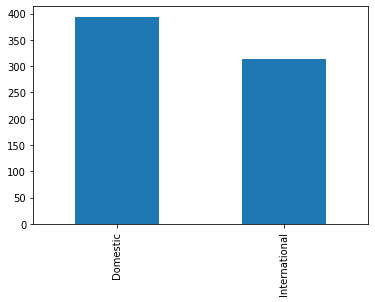

In [97]:
climbing['Loc_6'].value_counts().head(15).plot(kind='bar');
# Keep

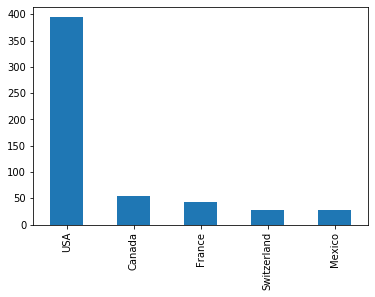

In [98]:
sport['Loc_4'].value_counts().head(5).plot(kind='bar')
#.head(10).plot(kind='barh');
# KEEP this one

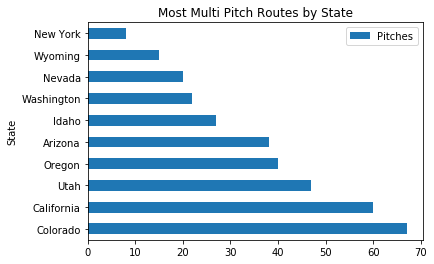

In [99]:
climbing[['Loc_3', 'Pitches']].groupby('Loc_3').count().sort_values('Pitches', ascending=False).head(10).plot(kind='barh');
plt.ylabel('State')
plt.title('Most Multi Pitch Routes by State');
# KEEP THIS IS A GOOD ONE

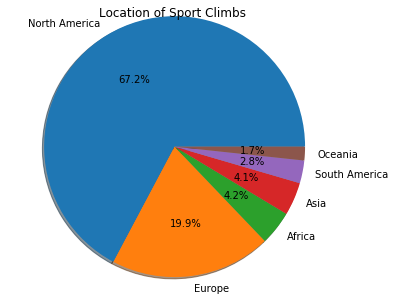

In [100]:
exp_vals = [476,141,30,29,20,12]
exp_labels = ['North America', 'Europe', 'Africa', 'Asia', 'South America', 'Oceania']
plt.axis('equal')
plt.pie(exp_vals, labels=exp_labels, radius = 1.5, autopct = '%0.1f%%', shadow = True)
plt.title('Location of Sport Climbs \n');

# DO NOT USE - this was for when i had sport, trad, top rope data which i do not have now

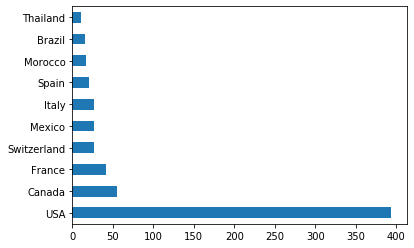

In [101]:
sport['Loc_4'].value_counts().head(10).plot(kind='barh');

## Length of Climbs

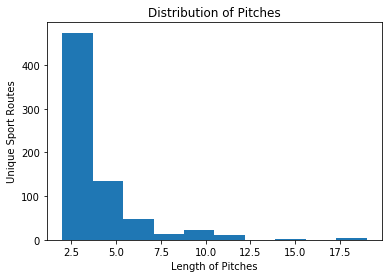

In [102]:
sport.Pitches.plot(kind='hist', bins=10)
plt.ylabel('Unique Sport Routes')
plt.xlabel('Length of Pitches')
plt.title('Distribution of Pitches');
# THIS GOES INTO FINAL PROJECT
# THE NEXT QUESTION IS, where are the long pitches located? Where are the short pitches located?

In [103]:
sport.sort_values(['Length_(feet)', 'Avg_Stars'], ascending=[0,0]).head(10)
# KEEP -  The longest pitches are international. I want to know more detail about that

,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
102,Moonwalker,4.0,19,3500.0,1067.0,-18.36256,-41.33499,Pedra Riscada,Minas Gerais,NaN,Brazil,South America,International,Sport,NaN,NaN,5.10a,PG13,NaN,https://www.mountainproject.com/route/11618110...
357,The Goat,3.2,19,2100.0,640.0,50.85270,-121.70470,Marble Canyon,Interior Plateau,NaN,Canada,North America,International,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11514586...
387,Qui L'eut cru?,3.4,10,1800.0,549.0,31.58690,-5.59110,Jardins d'ete,Todra Gorge,NaN,Morocco,Africa,International,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11404306...
604,Une arête dans la gorge,3.3,12,1800.0,549.0,31.58845,-5.59553,Arrete nord,Todra Gorge,NaN,Morocco,Africa,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/11214078...
325,Flyboys,3.1,18,1800.0,549.0,48.62285,-120.44865,Goat Wall,Mazama,Washington,USA,North America,Domestic,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11366537...
24,L'arete a Marion,4.0,14,1600.0,488.0,45.87235,6.46474,Col des Aravis,Northern Alps,NaN,France,Europe,International,Sport,NaN,NaN,5.7+,NaN,NaN,https://www.mountainproject.com/route/11350040...
167,Roberta Groba,4.0,10,1500.0,457.0,-22.33888,-42.72446,Capacete,Salinas / Três Picos,NaN,Brazil,South America,International,Sport,NaN,NaN,5.10a,NaN,NaN,https://www.mountainproject.com/route/11196149...
393,Sólidas Illusōes,3.5,11,1500.0,457.0,-22.33888,-42.72446,Capacete,Salinas / Três Picos,NaN,Brazil,South America,International,Sport,NaN,NaN,5.8+,NaN,NaN,https://www.mountainproject.com/route/11190305...
327,Royal Flush,3.0,8,1500.0,457.0,39.57230,-106.11100,Mount Royal (near Frisco),10 Mile Canyon,Colorado,USA,North America,Domestic,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/10681171...
364,Passion And Pain,4.0,7,1450.0,442.0,-16.01410,35.57370,Mulanje Massif,Malawi,NaN,Malawi,Africa,International,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11615466...


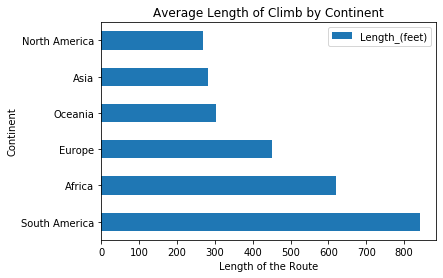

In [104]:
climbing[['Loc_5', 'Length_(feet)']].groupby('Loc_5').mean().sort_values('Length_(feet)',\
                                   ascending=False).plot(kind='barh')
plt.ylabel('Continent')
plt.xlabel('Length of the Route')
plt.title('Average Length of Climb by Continent');

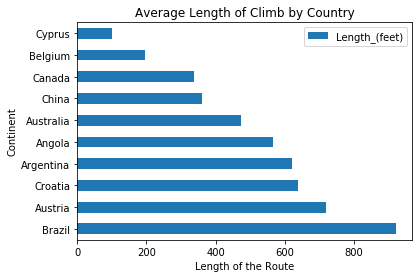

In [105]:
climbing[['Loc_4', 'Length_(feet)']].groupby('Loc_4').mean().head(10).sort_values('Length_(feet)',\
                                   ascending=False).plot(kind='barh')
plt.ylabel('Continent')
plt.xlabel('Length of the Route')
plt.title('Average Length of Climb by Country');

In [106]:
very_long = sport.Pitches >= 12
very_long.head()
sport[very_long].sort_values('Length_(feet)', ascending = False).head(5)
# KEEP this identifies the long pitches
# Brazil is a funny outlier..it has the longest sport climb but South America is only 2.8% of the climbs!

,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
102,Moonwalker,4.0,19,3500.0,1067.0,-18.36256,-41.33499,Pedra Riscada,Minas Gerais,NaN,Brazil,South America,International,Sport,NaN,NaN,5.10a,PG13,NaN,https://www.mountainproject.com/route/11618110...
357,The Goat,3.2,19,2100.0,640.0,50.85270,-121.70470,Marble Canyon,Interior Plateau,NaN,Canada,North America,International,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11514586...
325,Flyboys,3.1,18,1800.0,549.0,48.62285,-120.44865,Goat Wall,Mazama,Washington,USA,North America,Domestic,Sport,NaN,NaN,5.9,NaN,NaN,https://www.mountainproject.com/route/11366537...
604,Une arête dans la gorge,3.3,12,1800.0,549.0,31.58845,-5.59553,Arrete nord,Todra Gorge,NaN,Morocco,Africa,International,Sport,NaN,NaN,5.9+,NaN,NaN,https://www.mountainproject.com/route/11214078...
24,L'arete a Marion,4.0,14,1600.0,488.0,45.87235,6.46474,Col des Aravis,Northern Alps,NaN,France,Europe,International,Sport,NaN,NaN,5.7+,NaN,NaN,https://www.mountainproject.com/route/11350040...


## Climbing Difficulty Analysis (maybe put this at the beginning)

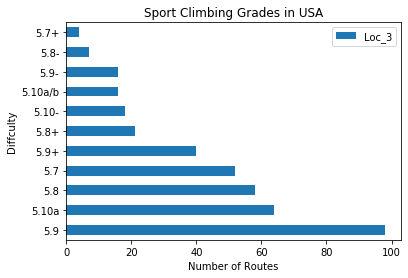

In [107]:
usa = climbing[['Loc_3', 'Class']].groupby('Class').count().sort_values('Loc_3', ascending=False).plot(kind='barh')
plt.ylabel('Diffculty')
plt.xlabel('Number of Routes')
plt.title('Sport Climbing Grades in USA');

In [108]:
most_popular = sport.Pitches < 4
most_popular.head()
sport[most_popular].sort_values('Avg_Stars', ascending = False).head(5)

,Route,Avg_Stars,Pitches,Length_(feet),Length_(meters),Area_Latitude,Area_Longitude,Loc_1,Loc_2,Loc_3,Loc_4,Loc_5,Loc_6,Route_type1,Route_type2,Route_type3,Class,Protection_Rating,Aid_Grading,URL
65,Pili y su catarro,4.0,2,180.0,55.0,41.64893,-1.72041,Peña de los Buitres,"Calcena, Aragón",NaN,Spain,Europe,International,Sport,NaN,NaN,5.9-,NaN,NaN,https://www.mountainproject.com/route/11075796...
564,Creamsicle Buttress,4.0,2,200.0,61.0,47.88339,-119.09213,Road Side Rock,Banks Lake / Northrup Canyon,Washington,USA,North America,Domestic,Sport,NaN,NaN,5.8,NaN,NaN,https://www.mountainproject.com/route/11533953...
164,The Cave Route,4.0,2,120.0,37.0,43.22272,-123.56263,Treasure Island,The Callahans,Oregon,USA,North America,Domestic,Sport,NaN,NaN,5.10a,NaN,NaN,https://www.mountainproject.com/route/11766865...
173,Triple Adu,4.0,3,500.0,152.0,37.33382,-119.39864,South Face,North Eagle Beak,California,USA,North America,Domestic,Sport,NaN,NaN,5.10a,NaN,NaN,https://www.mountainproject.com/route/11894387...
48,The Corona Jewel,4.0,2,60.0,18.0,53.46853,-113.56529,Horizon Village Wall,Whitemud Creek,NaN,Canada,North America,International,Sport,NaN,NaN,5.9+,PG13,NaN,https://www.mountainproject.com/route/11876674...


In [122]:
climbing[['Loc_3', 'Class']].groupby('Class').sort_values('Class', ascending=True).tail(10).plot(kind='barh');
plt.ylabel('State')
plt.xlabel('Number of Routes')
plt.title('x)');

AttributeError: Cannot access callable attribute 'sort_values' of 'DataFrameGroupBy' objects, try using the 'apply' method

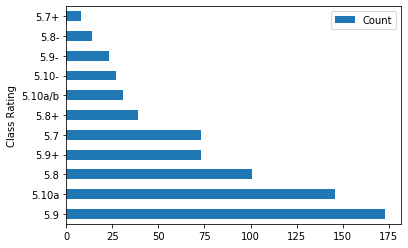

In [110]:
climbing_class = pd.DataFrame(climbing['Class'].value_counts(ascending=False))
climbing_class.index.name = 'Class Rating'
climbing_class.columns=['Count']
climbing_class.sort_values('Count', ascending=False, inplace=True)
climbing_class.plot(kind='barh')
# KEEP THIS FOR FINAL PROJECT
# THIS IS ALREADY IN THE PROJECT

In [111]:
climbing.columns

Index(['Route', 'URL', 'Avg_Stars', 'Pitches', 'Length_(feet)',
       'Length_(meters)', 'Area_Latitude', 'Area_Longitude', 'Loc_1', 'Loc_2',
       'Loc_3', 'Loc_4', 'Loc_5', 'Loc_6', 'Route_type1', 'Route_type2',
       'Route_type3', 'Class', 'Protection_Rating', 'Aid_Grading'],
      dtype='object')

In [112]:
pd.DataFrame(climbing.dtypes, columns = ['DataTypes'])

,DataTypes
Route,object
URL,object
Avg_Stars,float64
Pitches,int64
Length_(feet),float64
Length_(meters),float64
Area_Latitude,float64
Area_Longitude,float64
Loc_1,object
Loc_2,object


## Is there a state or country that has the longest pitches?

In [113]:
climbing['Length_(feet)'].dropna().value_counts(dropna=True)

200.0     52
400.0     38
150.0     36
180.0     34
300.0     25
          ..
3500.0     1
177.0      1
1450.0     1
459.0      1
118.0      1
Name: Length_(feet), Length: 114, dtype: int64

In [138]:
long = climbing [ ['Loc_4', 'Pitches', 'Length_(feet)' ]].groupby('Loc_4').mean().\
sort_values(by='Length_(feet)', ascending=False).head(10)

In [133]:
long.plot(kind='scatter', x='Country', y='Pitches', figsize=(15,5))

KeyError: 'Country'

In [115]:
avg_length.columns

NameError: name 'avg_length' is not defined

In [ ]:
avg_length.rename(columns = {'Pitches': 'Average Pitch'})

In [ ]:
avg_length.plot(kind='bar');

In [ ]:
stars = pd.DataFrame(climbing['Avg_Stars'].value_counts())
stars.index.name = 'Stars'
stars.columns=['Number of Routes']
stars.sort_values('Stars', ascending=True, inplace=True)
stars.plot(kind='barh');

In [ ]:
climbing.Avg_Stars.mean()

In [ ]:
# NEXT DO GROUP BY FOR TOP RATED CLIMBS IN USA and in EUROPE

## Among These Thrill Seekers, Where are the Boldest?

In [ ]:
protection = pd.DataFrame(climbing['Protection_Rating'].value_counts())
protection.index.name = "Rating"
protection
#i want to graph this also. not a pie chart. 

In [ ]:
climbing[['Avg_Stars', 'Loc_3']].groupby('Loc_3').mean()\
.sort_values(by='Avg_Stars', ascending = False).tail(5).plot(kind='barh')
plt.ylabel('State')
plt.title('Lowest Star Rating (average), by State');

In [ ]:
climbing[['Protection_Rating', 'Loc_4']].groupby('Loc_4').count().\
sort_values(by='Protection_Rating', ascending = False).head(4).plot(kind='barh');
plt.xlabel('Quantity')
plt.ylabel('Country')
plt.title('Number of Highly Dangerous Routes, by Country');

In [ ]:
climbing[['Protection_Rating', 'Loc_3']].groupby('Loc_3').count()\
.sort_values(by='Protection_Rating', ascending = False).head(6).plot(kind='barh')
plt.ylabel('State')
plt.title('Most Dangerous Climbing Routes by State');

In [ ]:
climbing[['Avg_Stars', 'Loc_3']].groupby('Loc_3').mean()\
.sort_values(by='Avg_Stars', ascending = False).head(20).plot(kind='barh')
plt.ylabel('State')
plt.title('Highest Star Rating, by State');

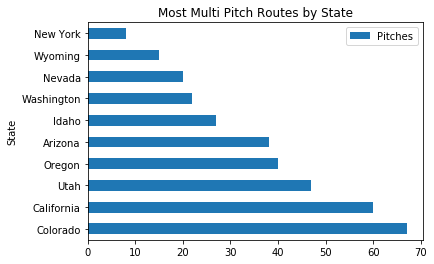

In [116]:
climbing[['Loc_3', 'Pitches']].groupby('Loc_3').count().sort_values('Pitches', ascending=False).head(10).plot(kind='barh');
plt.ylabel('State')
plt.title('Most Multi Pitch Routes by State');
# KEEP THIS IS A GOOD ONE

In [ ]:
null_df = pd.DataFrame(climbing.isnull().sum(), columns =['Count of Nulls'])
null_df.index.name = 'Column'
null_df.sort_values('Count of Nulls', ascending=False, inplace=True)
null_df
# DO NOT INCLUDE

In [ ]:
climbing.fillna(value={'Loc 3':'-', 'Loc 4':'-', 'Loc 5': '-', 'Loc 6': '-', 'Length (feet)':'Not Measured', 'Protection Rating':'G or PG', 'Aid Climbing Grading':'Not Given', 'Route Type 3':'-', 'Route Type 2':'-'}).head(10)